In [ ]:
!unzip /content/archive\ \(2\).zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from keras.layers import Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

model = Model(base_model.input, x)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint(filepath="resnetmodel.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [mc]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 500,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[mc])

<ipython-input-8-2b90db054acf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/500
10/10 [==============================] - ETA: 0s - loss: 8.6185 - accuracy: 0.1688
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to fermodel.h5
10/10 [==============================] - 21s 789ms/step - loss: 8.6185 - accuracy: 0.1688 - val_loss: 5.5752 - val_accuracy: 0.2812
Epoch 2/500
10/10 [==============================] - ETA: 0s - loss: 5.4807 - accuracy: 0.1875
Epoch 2: val_accuracy did not improve from 0.28125
10/10 [==============================] - 5s 465ms/step - loss: 5.4807 - accuracy: 0.1875 - val_loss: 4.1579 - val_accuracy: 0.1875
Epoch 3/500
10/10 [==============================] - ETA: 0s - loss: 4.2770 - accuracy: 0.1844
Epoch 3: val_accuracy did not improve from 0.28125
10/10 [==============================] - 5s 542ms/step - loss: 4.2770 - accuracy: 0.1844 - val_loss: 2.8094 - val_accuracy: 0.1992
Epoch 4/500
10/10 [==============================] - ETA: 0s - loss: 3.1003 - accuracy: 0.1969
Epoch 4: val_accuracy did not improve from 

In [ ]:
from keras.models import load_model
model = load_model("/content/fermodel.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

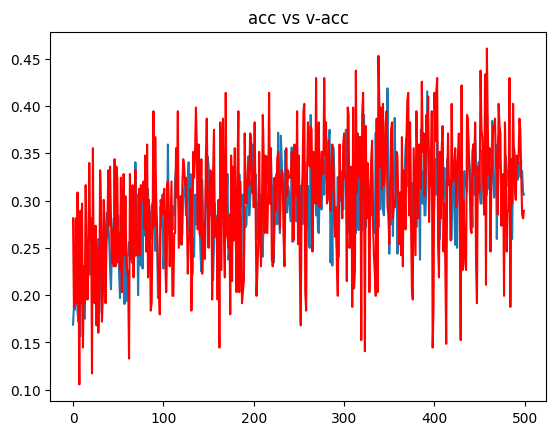

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

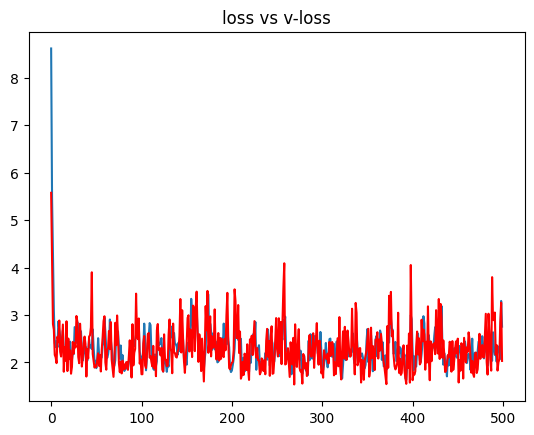

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()